In [2]:
import numpy as np, matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import scipy.integrate as integrate

In [5]:
def F(Z):
    return integrate.quad(lambda z:1.0/np.sqrt(z**3+1),0,Z)[0]

In [6]:
OmegaL=0.683;
OmegaM=1.0-OmegaL;
h=0.7 # reduced Hubble constant
A=(OmegaL/OmegaM)**0.3333
DH=3001.0/h # Mpc

In [41]:
def DM(Z):
    return A*DH/np.sqrt(OmegaL)*(F((Z+1)/A)-F(1.0/A)) 
    # result is in Mpc
def Dl(z): #luminous distance
    return (1+z)*DM(z)
    # result is in Mpc

In [8]:
# def DA(Z):
#     return DM(Z)/(Z+1)

In [9]:
def EZ(z):
    return np.sqrt(OmegaM*(1+z)**3+OmegaL)

In [10]:
zhigh=100.0
integrate.quad(lambda z:DM(z)**2/(1+z)/EZ(z),0,zhigh)[0]/DH**2

0.9313335996466094

In [11]:
def pp(z):
    return (A/np.sqrt(OmegaL)*(F((z+1)/A)-F(1.0/A)))**2/(EZ(z)*(1+z))

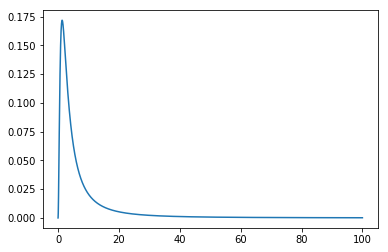

In [12]:
X=np.linspace(0,100,10000)
PP=[pp(x) for x in X]
plt.plot(X,PP)

The above $z$ distribution suggest that the most likely event are from $z\sim2$.

In [13]:
upper=max(PP)

In [14]:
#from scipy import *

In [15]:
N=10000

In [16]:
zwhole=np.random.uniform(0,zhigh,N)
ywhole=np.random.uniform(0,upper,N)
pwhole=np.interp(zwhole,X,PP)
mask=(ywhole<pwhole)

In [17]:
index=np.where(mask==True)[0]

In [18]:
len(index)

552

In [19]:
Nnew=round(N/(len(index))*N)

In [20]:
print(Nnew)

181159


In [21]:
zwhole=np.random.uniform(0,zhigh,Nnew)
ywhole=np.random.uniform(0,upper,Nnew)
pwhole=np.interp(zwhole,X,PP)
mask=(ywhole<pwhole)
index=np.where(mask==True)[0]
len(index)
zsampled=zwhole[index]

In [22]:
# plt.hist(zsampled,bins=20,density=True)

The sampling in $z$ is done

In [130]:
NM=len(index) # it is the number of sampled points
Msampled=np.random.normal(loc=1.5,scale=0.3,size=NM) # gaussian distribution with mean mass 1.5 solar mass, varsqrt=0.5 solar mass
cthsampled=np.random.uniform(1e-5,1,size=NM)
phisampled=np.random.uniform(0,6.283,size=NM)
cosisampled=np.random.uniform(1e-5,1,size=NM)
psisampled=np.random.uniform(0,3.14159,size=NM)

In [89]:
#thetasampled=np.arccos(cthsampled)
#isampled=np.arccos(cosisampled)
print(NM)

10033


In [81]:
M0=1.31 #solar mass
D0=1 #Mpc
rho0=5.1e4
#rhocri=1e5
def F1(cth,phi,psi):
    plus=-0.433*((1.0+cth**2)*np.sin(2.0*phi)*np.cos(2.0*psi)+2.0*cth*np.cos(2.0*phi)*np.sin(2.0*psi))
    cross=0.433*((1.0+cth**2)*np.sin(2.0*phi)*np.sin(2.0*psi)-2.0*cth*np.cos(2.0*phi)*np.cos(2.0*psi))
    return [plus,cross]
def rho(M,D,cth,phi,ci,psi):
    Deff=D/np.sqrt((0.5*(1.0+ci**2))**2*F1(cth,phi,psi)[0]**2+ci**2*F1(cth,phi,psi)[1]**2)
    #result=M/M0*D0/D*np.sqrt((1+ci**2)**2*F1(cth,phi,psi)[0]**2+4.*ci**2*F1(cth,phi,psi)[1]**2)*rho0
    result=(M/M0)**0.8333*(D0/Deff)*rho0
    return result
def f(M,D,cth,phi,ci,psi,rhocri):
    rhothis=rho(M,D,cth,phi,ci,psi)
    if rhothis>=rhocri:
        result=1.
    else:
        result=0.
    return result        

In [134]:
rho(1.31,1,1,0,1,0)
#f(1.31,D0,1,0,1,0,10)

44166.00000000001

In [135]:
rhocri=10.
summ=0.
for i in range(0,NM):
    D=Dl(zsampled[i]) # output is Mpc
    add=f(np.abs(Msampled[i]),D,cthsampled[i],phisampled[i],cosisampled[i],psisampled[i],rhocri)
    summ=summ+add
    #print(add,Msampled[i],D,cthsampled[i],phisampled[i],cosisampled[i],psisampled[i])
average=summ/(NM*1.0)
print("The fraction is %f" % average)

The fraction is 0.002691


In [69]:
def Percent(cri):
    summ=0
    for i in range(0,NM):
        D=Dl(zsampled[i])
        summ=summ+f(Msampled[i],D,cthsampled[i],phisampled[i],cosisampled[i],psisampled[i],cri)
    average=summ/NM
    return average

/Users/shuxu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


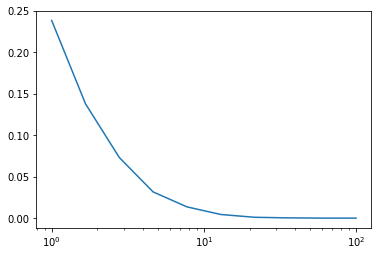

In [72]:
CRI=np.logspace(0,2,num=10)
AVE=[Percent(c) for c in CRI]
plt.xscale('log')
plt.plot(CRI,AVE)

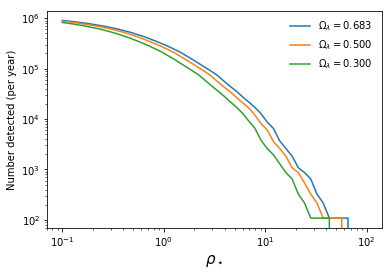

In [143]:
CRI=np.logspace(-1,2,num=50)
OL=[0.683,0.5,0.3]
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\rho_\star$',fontsize=15)
plt.ylabel('Number detected (per year)')
for OmegaL in OL:
    OmegaM=1.-OmegaL
    AVE=[Percent(c)*10.89e5 for c in CRI]    
    plt.plot(CRI,AVE,label=str('$\Omega_\lambda=%1.3f$' % OmegaL))
plt.legend(frameon=False)
plt.savefig('NvsR.eps')